<a href="https://colab.research.google.com/github/Habibmaryam/Flood-Prediction/blob/main/Flood_prediction_in_Lagos%2C_Nigeria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries**

In [1]:
#importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import matplotlib.pyplot as plt
from sklearn import metrics
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import f_oneway, kruskal

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Preprocessing**

In [4]:
# load the dataset and print the first 5 rows of the data set

lagos = pd.read_csv("/content/drive/MyDrive/Lagos_flood.csv")
lagos.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,windspeedmax,windspeedmin
0,Lagos,5/13/2004,31.7,28.2,30.0,38.9,32.6,35.8,24.9,74.7,...,NaN,2004-05-13T06:30:34,2004-05-13T18:55:02,0.80,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
1,Lagos,5/14/2004,26.6,25.7,26.3,26.6,25.7,26.3,25.9,97.5,...,NaN,2004-05-14T06:30:27,2004-05-14T18:55:10,0.83,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN
2,Lagos,5/15/2004,25.1,25.1,25.1,25.1,25.1,25.1,25.1,100.0,...,NaN,2004-05-15T06:30:20,2004-05-15T18:55:18,0.87,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
3,Lagos,5/16/2004,22.9,22.9,22.9,22.9,22.9,22.9,22.2,95.8,...,NaN,2004-05-16T06:30:14,2004-05-16T18:55:27,0.90,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
4,Lagos,5/17/2004,31.4,25.1,28.6,38.7,25.1,33.6,25.5,84.2,...,NaN,2004-05-17T06:30:08,2004-05-17T18:55:36,0.94,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN


In [5]:
# Knowing the size of the data set
lagos.shape

(7357, 34)

In [6]:
# Columns information
lagos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7357 entries, 0 to 7356
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              7357 non-null   object 
 1   datetime          7357 non-null   object 
 2   tempmax           7021 non-null   float64
 3   tempmin           7021 non-null   float64
 4   temp              7021 non-null   float64
 5   feelslikemax      7021 non-null   float64
 6   feelslikemin      7021 non-null   float64
 7   feelslike         7021 non-null   float64
 8   dew               7021 non-null   float64
 9   humidity          7021 non-null   float64
 10  precip            7021 non-null   float64
 11  precipprob        7021 non-null   float64
 12  precipcover       7357 non-null   float64
 13  preciptype        3340 non-null   object 
 14  flood occurrence  7357 non-null   int64  
 15  windgust          5420 non-null   float64
 16  windspeed         6991 non-null   float64


In [7]:
# Columns with null values
lagos.isnull().sum()

name                   0
datetime               0
tempmax              336
tempmin              336
temp                 336
feelslikemax         336
feelslikemin         336
feelslike            336
dew                  336
humidity             336
precip               336
precipprob           336
precipcover            0
preciptype          4017
flood occurrence       0
windgust            1937
windspeed            366
winddir              714
sealevelpressure     521
cloudcover           336
visibility           537
solarradiation      2425
solarenergy         2425
uvindex             2425
severerisk          6451
sunrise              366
sunset               366
moonphase            366
conditions           692
description          692
icon                 692
stations             692
windspeedmax        6991
windspeedmin        6991
dtype: int64

In [8]:
# Column names
lagos.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'flood occurrence', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'windspeedmax', 'windspeedmin'],
      dtype='object')

In [9]:
# Convert the datetime column to a proper datetime format
lagos['datetime'] = pd.to_datetime(lagos['datetime'], dayfirst=True, errors='coerce')


In [10]:
# Handle missing values in the 'precip' column by forward filling
lagos['precip'] = lagos['precip'].fillna(method='ffill')

In [11]:
tempax_mean = lagos['tempmax'].mean()
tempax_mean

31.22402791625125

In [12]:
# Fill the empty cells in the 'tempmax' column
lagos['tempmax'] = lagos['tempmax'].fillna(tempax_mean)

In [13]:
lagos['tempmax'].isna().sum()

0

In [14]:
tempmin_mean = lagos['tempmin'].mean()
tempmin_mean

24.43050847457627

In [15]:
# Fill the empty cells in the 'tempmin' column
lagos['tempmin'] = lagos['tempmin'].fillna(tempmin_mean)

In [16]:
humidity_mean = lagos['humidity'].mean()
humidity_mean

82.73332858567154

In [17]:
# Fill the empty cells in the 'humidity' column
lagos['humidity'] = lagos['humidity'].fillna(humidity_mean)

In [18]:
windspeed_mean = lagos['windspeed'].mean()
windspeed_mean

22.34547275067945

In [19]:
# Fill the empty cells in the 'windspeed' column with 'no rain'
lagos['windspeed'] = lagos['windspeed'].fillna(windspeed_mean)

In [20]:
winddir_mean = lagos['winddir'].mean()
winddir_mean

219.0587084148728

In [21]:
# Fill the empty cells in the 'winddir' column with 'no rain'
lagos['winddir'] = lagos['winddir'].fillna(winddir_mean)

In [22]:
cloudcover_mean = lagos['cloudcover'].mean()
cloudcover_mean

60.31083891183592

In [23]:
# Fill the empty cells in the 'winddir' column with 'no rain'
lagos['cloudcover'] = lagos['cloudcover'].fillna(cloudcover_mean)

In [24]:
visibility_mean = lagos['visibility'].mean()
visibility_mean

8.778958944281525

In [25]:
# Fill the empty cells in the 'winddir' column with 'no rain'
lagos['visibility'] = lagos['visibility'].fillna(visibility_mean)

In [26]:
feelslikemin_mean = lagos['feelslikemin'].mean()
feelslikemin_mean

24.90690784788492

In [27]:
# Fill the empty cells in the 'winddir' column with 'no rain'
lagos['feelslikemin'] = lagos['feelslikemin'].fillna(feelslikemin_mean)

In [28]:
feelslikemax_mean = lagos['feelslikemax'].mean()
feelslikemax_mean

37.138199686654325

In [29]:
# Fill the empty cells in the 'winddir' column with 'no rain'
lagos['feelslikemax'] = lagos['feelslikemax'].fillna(feelslikemax_mean)

In [30]:
dew_mean = lagos['dew'].mean()
dew_mean

23.967013245976357

In [31]:
# Fill the empty cells in the 'winddir' column with 'no rain'
lagos['dew'] = lagos['dew'].fillna(dew_mean)

In [32]:
sealevelpressure_mean = lagos['sealevelpressure'].mean()
sealevelpressure_mean

1012.0425833820948

In [33]:
# Fill the empty cells in the 'winddir' column with 'no rain'
lagos['sealevelpressure'] = lagos['sealevelpressure'].fillna(dew_mean)

In [34]:
# Create a cumulative precipitation column
lagos['cumulative_precip'] = lagos['precip'].cumsum()
lagos.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunrise,sunset,moonphase,conditions,description,icon,stations,windspeedmax,windspeedmin,cumulative_precip
0,Lagos,2004-05-13,31.7,28.2,30.0,38.9,32.6,35.8,24.9,74.7,...,2004-05-13T06:30:34,2004-05-13T18:55:02,0.80,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN,0.0
1,Lagos,2004-05-14,26.6,25.7,26.3,26.6,25.7,26.3,25.9,97.5,...,2004-05-14T06:30:27,2004-05-14T18:55:10,0.83,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN,0.0
2,Lagos,2004-05-15,25.1,25.1,25.1,25.1,25.1,25.1,25.1,100.0,...,2004-05-15T06:30:20,2004-05-15T18:55:18,0.87,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN,0.0
3,Lagos,2004-05-16,22.9,22.9,22.9,22.9,22.9,22.9,22.2,95.8,...,2004-05-16T06:30:14,2004-05-16T18:55:27,0.90,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN,0.0
4,Lagos,2004-05-17,31.4,25.1,28.6,38.7,25.1,33.6,25.5,84.2,...,2004-05-17T06:30:08,2004-05-17T18:55:36,0.94,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN,0.0


In [35]:
# Define flood threshold (example: 200 mm in 7 days)
flood_threshold = 200
lagos['is_flood'] = lagos['cumulative_precip'] >= flood_threshold

In [36]:
# Save the updated DataFrame to a new CSV file
lagos.to_csv('lagos_flood_prediction.csv', index=False)

print("Data saved to 'lagos_flood_prediction.csv'")

Data saved to 'lagos_flood_prediction.csv'


# **3. Exploratory Data Analysis (EDA)**

In [37]:
lagos.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,7357,2014-06-08 00:00:00,2004-05-13 00:00:00,2009-05-26 00:00:00,2014-06-08 00:00:00,2019-06-21 00:00:00,2024-07-03 00:00:00,NaN
tempmax,7357.0,31.224028,21.4,29.2,31.224028,33.1,56.0,2.511114
tempmin,7357.0,24.430508,10.0,23.4,24.430508,25.2,34.6,1.845925
temp,7021.0,27.410255,21.4,26.2,27.4,28.6,34.6,1.586159
feelslikemax,7357.0,37.1382,21.4,34.1,37.3,40.6,56.0,4.488366
feelslikemin,7357.0,24.906908,6.8,23.4,24.5,25.2,45.1,2.906888
feelslike,7021.0,30.32521,21.4,27.5,30.1,32.8,45.1,3.493872
dew,7357.0,23.967013,8.2,23.5,24.2,25.0,66.5,1.89029
humidity,7357.0,82.733329,33.8,80.5,83.4,86.6,100.0,7.067742
precip,7357.0,4.986829,0.0,0.0,0.0,1.8,299.0,18.411755


Flood occurence

*3.1 Precipitation Patterns*

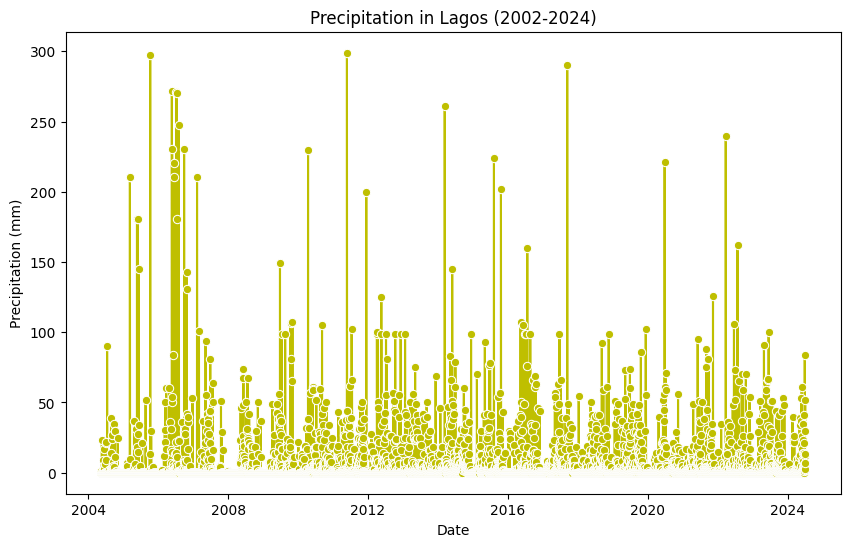

In [38]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='datetime', y='precip', data=lagos, marker='o',linestyle='-', color='y')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation in Lagos (2002-2024)')
plt.show()

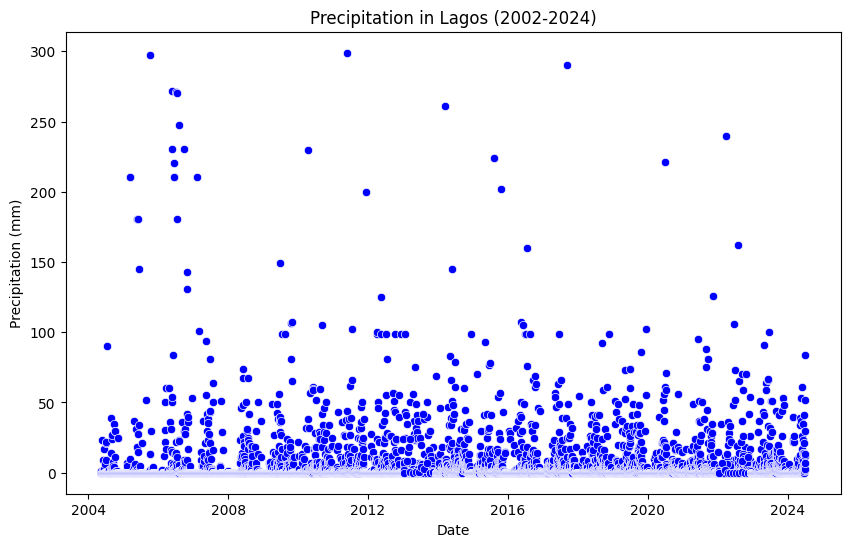

In [39]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='datetime', y='precip', data=lagos, color='blue')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation in Lagos (2002-2024)')
plt.show()


*3.2 Historical Flood Analysis*

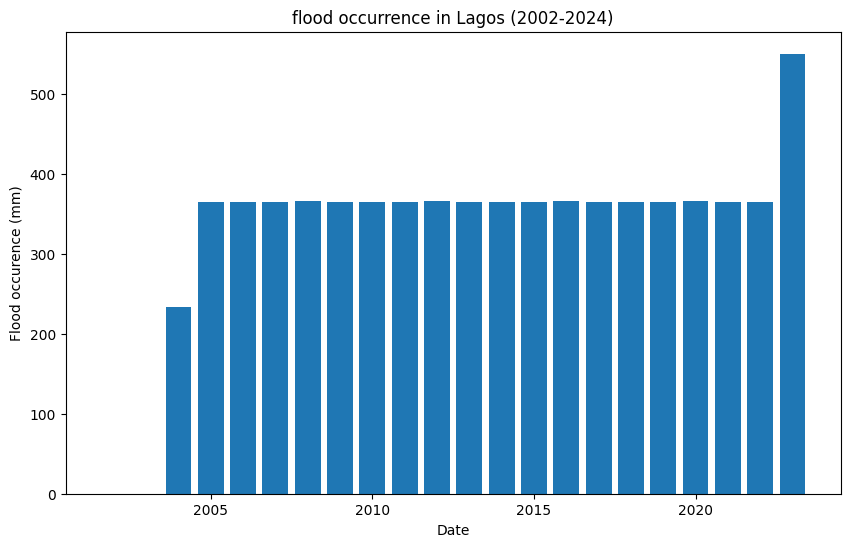

In [40]:
# Create the scatter plot
plt.figure(figsize=(10, 6))

# Assuming 'lagos' DataFrame has a 'datetime' column representing dates,
# and you want to count flood occurrences per year:
flood_dates = lagos['datetime']

plt.hist(flood_dates.dt.year, bins=range(2002, 2025), align='left', rwidth=0.8)
plt.xlabel('Date')
plt.ylabel('Flood occurence (mm)')
plt.title('flood occurrence in Lagos (2002-2024)')
plt.show()

*Seasonal variation*

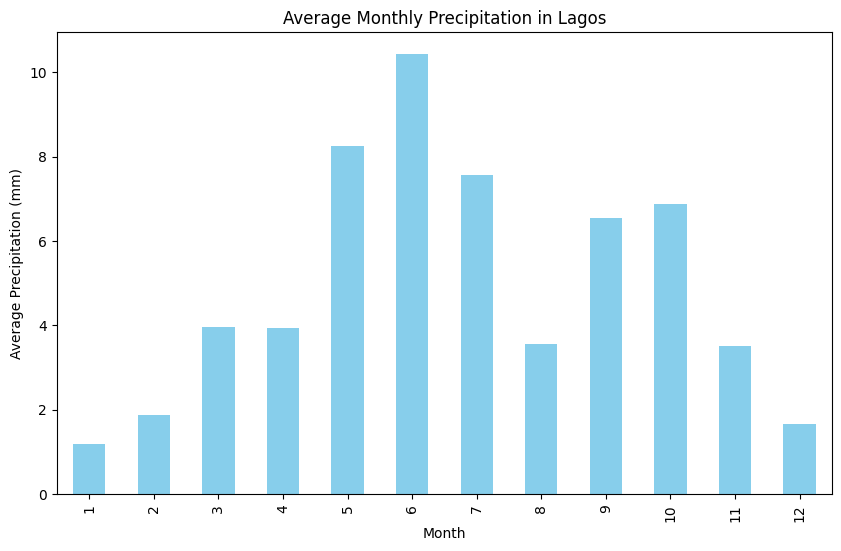

In [41]:
# Plot seasonal variation
# Calculate average monthly precipitation
monthly_precip = lagos.groupby(lagos['datetime'].dt.month)['precip'].mean()

# Plot seasonal variation
plt.figure(figsize=(10, 6))
monthly_precip.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Precipitation (mm)')
plt.title('Average Monthly Precipitation in Lagos')
plt.show()

# **4. Model Development**

*4.1 Feature Selection*

In [42]:
# Feature selection
features = lagos[['cumulative_precip','tempmax', 'tempmin','feelslikemax',
       'feelslikemin','dew', 'humidity','windspeed', 'winddir','sealevelpressure', 'cloudcover']].shift(1).dropna()
target = lagos['flood occurrence'][1:]

In [43]:
x = lagos[features.columns] # Select columns by name using .columns
y = lagos[target.name] # Select column by name

In [44]:
# Print features
x.head()

,cumulative_precip,tempmax,tempmin,feelslikemax,feelslikemin,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover
0,0.0,31.7,28.2,38.9,32.6,24.9,74.7,20.5,128.2,23.967013,90.0
1,0.0,26.6,25.7,26.6,25.7,25.9,97.5,20.5,280.4,23.967013,87.5
2,0.0,25.1,25.1,25.1,25.1,25.1,100.0,16.6,180.0,23.967013,90.0
3,0.0,22.9,22.9,22.9,22.9,22.2,95.8,11.2,350.0,23.967013,90.0
4,0.0,31.4,25.1,38.7,25.1,25.5,84.2,31.3,242.3,23.967013,90.0


In [45]:
# Check x variables for null values
x.isna().sum()

cumulative_precip    0
tempmax              0
tempmin              0
feelslikemax         0
feelslikemin         0
dew                  0
humidity             0
windspeed            0
winddir              0
sealevelpressure     0
cloudcover           0
dtype: int64

In [46]:
# Print target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: flood occurrence, dtype: int64

*4.2 Model Training*

In [47]:
# Create an instance of the OneHotEncoder
#encoder = OneHotEncoder()
#encoder

In [48]:
# Calling the machine learning model to be used
model = LogisticRegression()
model

LogisticRegression()

In [49]:
# Model fitting
reg = model.fit(x,y)
reg

LogisticRegression()

In [50]:
model.score(x,y)

0.9938833763762404

In [51]:
# Ensure features and target have the same length
features = features.iloc[:len(target), :]  # Adjust features to match target length

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, y_test, x_train, y_train

(      cumulative_precip    tempmax    tempmin  feelslikemax  feelslikemin  \
 1893             8909.6  31.224028  24.430508       37.1382     24.906908   
 4384            21875.9  33.000000  26.000000       42.1000     26.000000   
 6820            33898.4  33.900000  24.000000       39.0000     24.000000   
 5905            29993.2  29.100000  23.700000       33.2000     23.700000   
 1669             7907.2  30.100000  23.100000       34.3000     23.100000   
 ...                 ...        ...        ...           ...           ...   
 2699            12819.2  26.600000  23.000000       26.6000     23.000000   
 6983            34892.7  30.000000  22.900000       34.9000     22.900000   
 3362            16715.7  28.100000  24.000000       32.8000     24.000000   
 6830            33898.6  35.000000  25.000000       41.9000     25.000000   
 2986            14707.3  29.000000  23.800000       32.1000     23.800000   
 
             dew   humidity  windspeed     winddir  sealevelpr

In [52]:
predictions = model.predict(x_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
# Evaluate model
accuracy = (predictions == y_test).mean()
print(f'Prediction Accuracy: {accuracy * 100:.2f}%')

Prediction Accuracy: 99.39%


In [54]:
# Assuming 'lagos' is your DataFrame and you want to predict on the last row
latest_data = lagos.iloc[[-1]]  # Select the last row

# Select only the features used during training
training_features = ['cumulative_precip','tempmax', 'tempmin','feelslikemax',
       'feelslikemin','dew', 'humidity','windspeed', 'winddir','sealevelpressure', 'cloudcover']
latest_data = latest_data[training_features]

# Predict the next flood
next_flood = model.predict(latest_data)

# Get the next date for prediction
next_date = pd.to_datetime(lagos['datetime'].iloc[-1]) + pd.Timedelta(days=365)
print(f'Next Flood Prediction for {next_date.date()}: {"Yes" if next_flood else "No"}')

Next Flood Prediction for 2025-07-03: No
